# Hackathon Project Code

### Imports

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
pd.options.display.max_columns = 125


### Read in Data

In [26]:
kobe = pd.read_csv('kobe_shot_data.csv')

In [27]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


### EDA and Cleaning

In [28]:
kobe.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [29]:
kobe.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [30]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

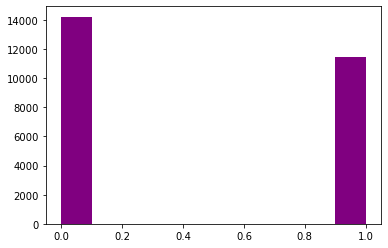

In [32]:
plt.hist(kobe['shot_made_flag'], color = 'purple');

In [33]:
kobe['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

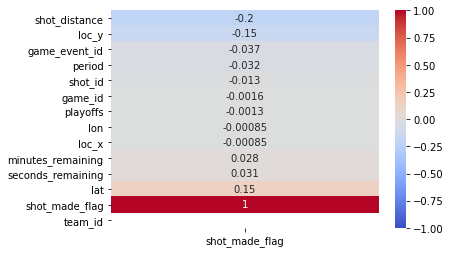

In [35]:
# Heatmap
sns.heatmap(kobe.corr()[['shot_made_flag']].sort_values('shot_made_flag'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm');

In [185]:
colors = kobe_shots['shot_made_flag'].map({0:'purple', 1: 'yellow'})

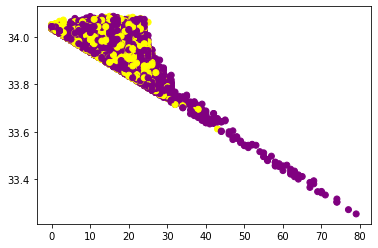

In [190]:
plt.scatter(kobe_shots['shot_distance'], kobe_shots['lat'], c = colors);

In [36]:
kobe['action_type'].value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [37]:
kobe['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

In [41]:
kobe['shot_type'].value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [42]:
kobe['shot_zone_area'].value_counts()

Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: shot_zone_area, dtype: int64

In [43]:
kobe['shot_zone_basic'].value_counts()

Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: shot_zone_basic, dtype: int64

In [45]:
kobe['opponent'].value_counts()

SAS    1978
PHX    1781
HOU    1666
SAC    1643
DEN    1642
POR    1539
UTA    1490
MIN    1474
GSW    1356
LAC    1285
DAL    1199
MEM    1030
BOS     946
SEA     828
IND     761
PHI     720
ORL     719
DET     715
OKC     677
TOR     664
NYK     657
MIA     627
CHA     620
CLE     619
CHI     610
WAS     600
MIL     586
NOH     581
NJN     520
ATL     519
NOP     344
VAN     246
BKN      55
Name: opponent, dtype: int64

In [72]:
kobe_shots = pd.get_dummies(kobe, columns = ['action_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'opponent', 'season'], drop_first=True)


In [73]:
kobe_shots.shape

(30697, 138)

In [60]:
kobe_shots['shot_made_flag'].isnull().sum()

5000

In [74]:
kobe_shots_test = kobe_shots[kobe_shots['shot_made_flag'].isnull()]

In [76]:
kobe_shots_test.drop(columns='shot_made_flag', inplace=True)

/Users/brandonhoskins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
kobe_shots_test

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_zone_range,team_id,team_name,game_date,matchup,shot_id,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Layup Shot,action_type_Finger Roll Shot,action_type_Floating Jump shot,action_type_Follow Up Dunk Shot,action_type_Hook Bank Shot,action_type_Hook Shot,action_type_Jump Bank Shot,action_type_Jump Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Pullup Bank shot,action_type_Pullup Jump shot,action_type_Putback Dunk Shot,action_type_Putback Layup Shot,action_type_Putback Slam Dunk Shot,action_type_Reverse Dunk Shot,action_type_Reverse Layup Shot,action_type_Reverse Slam Dunk Shot,action_type_Running Bank shot,action_type_Running Dunk Shot,action_type_Running Finger Roll Layup Shot,action_type_Running Finger Roll Shot,action_type_Running Hook Shot,action_type_Running Jump Shot,action_type_Running Layup Shot,action_type_Running Pull-Up Jump Shot,action_type_Running Reverse Layup Shot,...,shot_zone_area_Center(C),shot_zone_area_Left Side Center(LC),shot_zone_area_Left Side(L),shot_zone_area_Right Side Center(RC),shot_zone_area_Right Side(R),shot_zone_basic_Backcourt,shot_zone_basic_In The Paint (Non-RA),shot_zone_basic_Left Corner 3,shot_zone_basic_Mid-Range,shot_zone_basic_Restricted Area,shot_zone_basic_Right Corner 3,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,season_1997-98,season_1998-99,season_1999-00,season_2000-01,season_2001-02,season_2002-03,season_2003-04,season_2004-05,season_2005-06,season_2006-07,season_2007-08,season_2008-09,season_2009-10,season_2010-11,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16
0,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,27,18,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,0,5,2,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,0,1,0,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,0,46,0,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,20,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [79]:
kobe_shots.dropna(inplace=True)

In [80]:
kobe_shots

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_zone_range,team_id,team_name,game_date,matchup,shot_id,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Layup Shot,action_type_Finger Roll Shot,action_type_Floating Jump shot,action_type_Follow Up Dunk Shot,action_type_Hook Bank Shot,action_type_Hook Shot,action_type_Jump Bank Shot,action_type_Jump Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Pullup Bank shot,action_type_Pullup Jump shot,action_type_Putback Dunk Shot,action_type_Putback Layup Shot,action_type_Putback Slam Dunk Shot,action_type_Reverse Dunk Shot,action_type_Reverse Layup Shot,action_type_Reverse Slam Dunk Shot,action_type_Running Bank shot,action_type_Running Dunk Shot,action_type_Running Finger Roll Layup Shot,action_type_Running Finger Roll Shot,action_type_Running Hook Shot,action_type_Running Jump Shot,action_type_Running Layup Shot,action_type_Running Pull-Up Jump Shot,...,shot_zone_area_Center(C),shot_zone_area_Left Side Center(LC),shot_zone_area_Left Side(L),shot_zone_area_Right Side Center(RC),shot_zone_area_Right Side(R),shot_zone_basic_Backcourt,shot_zone_basic_In The Paint (Non-RA),shot_zone_basic_Left Corner 3,shot_zone_basic_Mid-Range,shot_zone_basic_Restricted Area,shot_zone_basic_Right Corner 3,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,season_1997-98,season_1998-99,season_1999-00,season_2000-01,season_2001-02,season_2002-03,season_2003-04,season_2004-05,season_2005-06,season_2006-07,season_2007-08,season_2008-09,season_2009-10,season_2010-11,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16
1,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Jump Shot,

### Model Prep: Setting Up X and Y

In [86]:
X = kobe_shots.drop(columns=['combined_shot_type', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup', 'shot_made_flag'])
y = kobe_shots['shot_made_flag']

### Baseline Score

In [87]:
y.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

### Train Test Split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)

### Random Forest Model Instantiation

In [89]:
rf = RandomForestClassifier()

### Grid Search

In [92]:
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50 , 75, 100, 125],
    'max_depth': [None, 3, 4],
    'max_features': ['auto', None]
}
gs = GridSearchCV(rf, param_grid = params)

In [93]:
gs.fit(X_train, y_train)
print(gs.best_score_) # cross val score!!
gs.best_params_

0.6786528120765933


{'max_depth': 4, 'max_features': None, 'n_estimators': 125}

In [95]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.6794831880448319, 0.683579766536965)

### Confusion Matrix For Random Forest Model

In [98]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

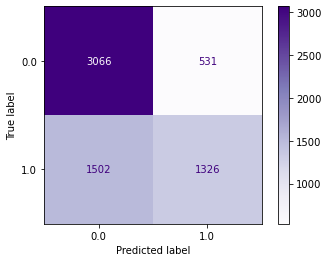

In [99]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Purples', values_format='d');

In [100]:
# Specificity
tn / (tn + fp)

0.8523769808173478

In [101]:
# Sensitivity
tp / (tp + fn)

0.46888260254596886

### Test Model on the 5000 shots

In [103]:
X_TEST = kobe_shots_test.drop(columns=['combined_shot_type', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup'])


In [104]:
kobe_shots_test['shots_made_flag_preds'] = gs.predict(X_TEST)

<ipython-input-104-d4473cb20cfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_shots_test['shots_made_flag_preds'] = gs.predict(X_TEST)


In [105]:
kobe_shots_test.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_zone_range,team_id,team_name,game_date,matchup,shot_id,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Layup Shot,action_type_Finger Roll Shot,action_type_Floating Jump shot,action_type_Follow Up Dunk Shot,action_type_Hook Bank Shot,action_type_Hook Shot,action_type_Jump Bank Shot,action_type_Jump Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Pullup Bank shot,action_type_Pullup Jump shot,action_type_Putback Dunk Shot,action_type_Putback Layup Shot,action_type_Putback Slam Dunk Shot,action_type_Reverse Dunk Shot,action_type_Reverse Layup Shot,action_type_Reverse Slam Dunk Shot,action_type_Running Bank shot,action_type_Running Dunk Shot,action_type_Running Finger Roll Layup Shot,action_type_Running Finger Roll Shot,action_type_Running Hook Shot,action_type_Running Jump Shot,action_type_Running Layup Shot,action_type_Running Pull-Up Jump Shot,action_type_Running Reverse Layup Shot,...,shot_zone_area_Left Side Center(LC),shot_zone_area_Left Side(L),shot_zone_area_Right Side Center(RC),shot_zone_area_Right Side(R),shot_zone_basic_Backcourt,shot_zone_basic_In The Paint (Non-RA),shot_zone_basic_Left Corner 3,shot_zone_basic_Mid-Range,shot_zone_basic_Restricted Area,shot_zone_basic_Right Corner 3,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,season_1997-98,season_1998-99,season_1999-00,season_2000-01,season_2001-02,season_2002-03,season_2003-04,season_2004-05,season_2005-06,season_2006-07,season_2007-08,season_2008-09,season_2009-10,season_2010-11,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16,shots_made_flag_preds
0,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,27,18,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,0,5,2,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
16,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,0,1,0,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
19,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,0,46,0,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,20,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [106]:
rf_predictions = pd.DataFrame({'shot_id': kobe_shots_test['shot_id'],
                           'shot_made_flag': kobe_shots_test['shots_made_flag_preds']})

In [107]:
rf_predictions

,shot_id,shot_made_flag
0,1,0.0
7,8,0.0
16,17,1.0
19,20,1.0
32,33,0.0
...,...,...
30668,30669,0.0
30680,30681,0.0
30682,30683,1.0
30686,30687,1.0


### K-Nearest Neighbors

### Standard Scaler

In [148]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [149]:
knn = KNeighborsClassifier()

In [150]:
cross_val_score(knn, X_train_sc, y_train).mean()

0.6105229730830299

In [151]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [152]:
knn.score(X_train_sc, y_train), knn.score(X_test_sc, y_test)

(0.7461083437110835, 0.6140077821011674)

### Confusion Matrix with K-Nearest Neighbors

In [154]:
preds = knn.predict(X_test_sc)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

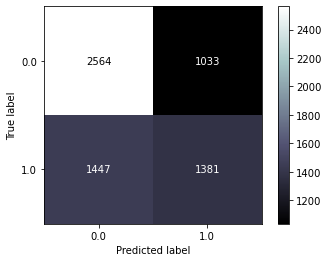

In [156]:
plot_confusion_matrix(knn, X_test_sc, y_test, cmap='bone', values_format='d');

In [157]:
# Specificity
tn / (tn + fp)

0.7128162357520156

In [158]:
# Sensitivity
tp / (tp + fn)

0.48833097595473834

### Predict the 5000 Shots

In [175]:
X_TEST = kobe_shots_test.drop(columns=['combined_shot_type', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup','shots_made_flag_preds_knn','shots_made_flag_preds', 'shots_made_flag_preds_l2'])
X_TEST_sc = ss.transform(X_TEST)
kobe_shots_test['shots_made_flag_preds_knn'] = knn.predict(X_TEST_sc)


<ipython-input-175-c8ac469ce897>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_shots_test['shots_made_flag_preds_knn'] = knn.predict(X_TEST_sc)


In [176]:
knn_predictions = pd.DataFrame({'shot_id': kobe_shots_test['shot_id'],
                           'shot_made_flag': kobe_shots_test['shots_made_flag_preds_knn']})

In [177]:
knn_predictions

,shot_id,shot_made_flag
0,1,1.0
7,8,0.0
16,17,1.0
19,20,1.0
32,33,0.0
...,...,...
30668,30669,0.0
30680,30681,1.0
30682,30683,1.0
30686,30687,1.0


### Neural Networks With Keras

### Standard Scaler

In [109]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Building the Network

In [111]:
X_train.shape

(19272, 131)

### Neural Network Model with No Regularization

In [121]:
model = Sequential()

model.add(Dense(130,
               activation='relu',
               input_shape=(131,)))

model.add(Dense(60, 
               activation='relu'))


model.add(Dense(1,
               activation='sigmoid'))

In [122]:
# Compile
model.compile(loss='bce',
             optimizer='adam',
             metrics=['accuracy'])

In [123]:
history = model.fit(X_train_sc, y_train,
                   validation_data=(X_test_sc, y_test),
                   epochs=100,
                   verbose=2)

Epoch 1/100
603/603 - 1s - loss: 0.6336 - accuracy: 0.6600 - val_loss: 0.6248 - val_accuracy: 0.6747
Epoch 2/100
603/603 - 1s - loss: 0.6033 - accuracy: 0.6829 - val_loss: 0.6214 - val_accuracy: 0.6752
Epoch 3/100
603/603 - 1s - loss: 0.5907 - accuracy: 0.6898 - val_loss: 0.6286 - val_accuracy: 0.6700
Epoch 4/100
603/603 - 1s - loss: 0.5809 - accuracy: 0.6929 - val_loss: 0.6330 - val_accuracy: 0.6657
Epoch 5/100
603/603 - 1s - loss: 0.5715 - accuracy: 0.7012 - val_loss: 0.6335 - val_accuracy: 0.6689
Epoch 6/100
603/603 - 1s - loss: 0.5620 - accuracy: 0.7051 - val_loss: 0.6375 - val_accuracy: 0.6661
Epoch 7/100
603/603 - 1s - loss: 0.5517 - accuracy: 0.7131 - val_loss: 0.6491 - val_accuracy: 0.6571
Epoch 8/100
603/603 - 1s - loss: 0.5388 - accuracy: 0.7221 - val_loss: 0.6590 - val_accuracy: 0.6400
Epoch 9/100
603/603 - 1s - loss: 0.5287 - accuracy: 0.7264 - val_loss: 0.6646 - val_accuracy: 0.6537
Epoch 10/100
603/603 - 1s - loss: 0.5165 - accuracy: 0.7353 - val_loss: 0.6760 - val_accura

Epoch 82/100
603/603 - 1s - loss: 0.1191 - accuracy: 0.9544 - val_loss: 2.5271 - val_accuracy: 0.5921
Epoch 83/100
603/603 - 1s - loss: 0.1096 - accuracy: 0.9590 - val_loss: 2.6057 - val_accuracy: 0.5810
Epoch 84/100
603/603 - 1s - loss: 0.1186 - accuracy: 0.9553 - val_loss: 2.5643 - val_accuracy: 0.5826
Epoch 85/100
603/603 - 1s - loss: 0.1098 - accuracy: 0.9584 - val_loss: 2.6208 - val_accuracy: 0.5927
Epoch 86/100
603/603 - 1s - loss: 0.1073 - accuracy: 0.9595 - val_loss: 2.5835 - val_accuracy: 0.5938
Epoch 87/100
603/603 - 1s - loss: 0.1101 - accuracy: 0.9596 - val_loss: 2.5970 - val_accuracy: 0.6008
Epoch 88/100
603/603 - 1s - loss: 0.1132 - accuracy: 0.9578 - val_loss: 2.6487 - val_accuracy: 0.5928
Epoch 89/100
603/603 - 1s - loss: 0.1062 - accuracy: 0.9627 - val_loss: 2.6578 - val_accuracy: 0.5904
Epoch 90/100
603/603 - 1s - loss: 0.1082 - accuracy: 0.9613 - val_loss: 2.6821 - val_accuracy: 0.5908
Epoch 91/100
603/603 - 1s - loss: 0.1112 - accuracy: 0.9598 - val_loss: 2.7144 - v

### Visualize the Loss

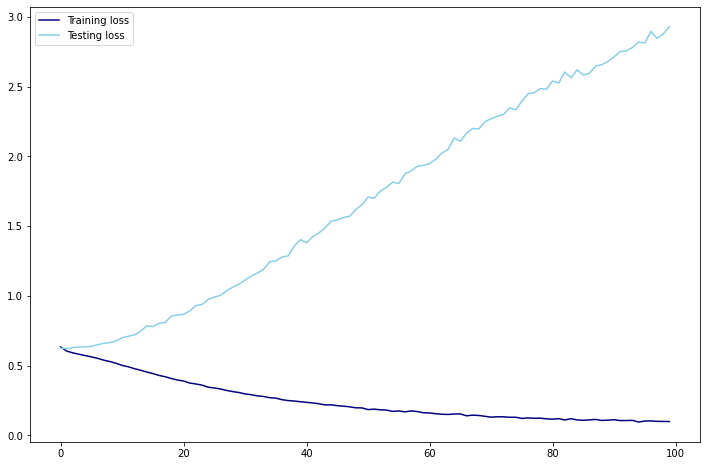

In [124]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Visualize the Accuracy

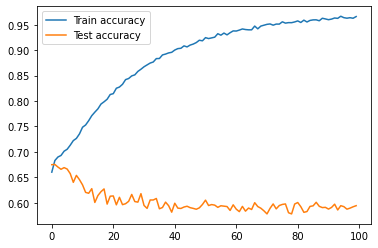

In [132]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

### Model with L2 Regularization

In [125]:
model_l2 = Sequential()

model_l2.add(Dense(130,
               activation='relu',
               input_shape=(131,),
               kernel_regularizer=l2(0.005)))

model_l2.add(Dense(60, 
               activation='relu',
               kernel_regularizer=l2(0.005)))


model_l2.add(Dense(1,
               activation='sigmoid',
               kernel_regularizer=l2(0.005)))

In [126]:
# Compile
model_l2.compile(loss='bce',
             optimizer='adam',
             metrics=['accuracy'])

In [127]:
history_l2 = model_l2.fit(X_train_sc, y_train,
                   validation_data=(X_test_sc, y_test),
                   epochs=100,
                   verbose=2)

Epoch 1/100
603/603 - 1s - loss: 0.9954 - accuracy: 0.6664 - val_loss: 0.7216 - val_accuracy: 0.6781
Epoch 2/100
603/603 - 1s - loss: 0.6690 - accuracy: 0.6792 - val_loss: 0.6442 - val_accuracy: 0.6851
Epoch 3/100
603/603 - 1s - loss: 0.6380 - accuracy: 0.6787 - val_loss: 0.6374 - val_accuracy: 0.6811
Epoch 4/100
603/603 - 1s - loss: 0.6324 - accuracy: 0.6800 - val_loss: 0.6334 - val_accuracy: 0.6819
Epoch 5/100
603/603 - 1s - loss: 0.6310 - accuracy: 0.6801 - val_loss: 0.6305 - val_accuracy: 0.6834
Epoch 6/100
603/603 - 1s - loss: 0.6295 - accuracy: 0.6812 - val_loss: 0.6307 - val_accuracy: 0.6830
Epoch 7/100
603/603 - 1s - loss: 0.6281 - accuracy: 0.6818 - val_loss: 0.6289 - val_accuracy: 0.6845
Epoch 8/100
603/603 - 1s - loss: 0.6274 - accuracy: 0.6810 - val_loss: 0.6317 - val_accuracy: 0.6823
Epoch 9/100
603/603 - 1s - loss: 0.6263 - accuracy: 0.6819 - val_loss: 0.6298 - val_accuracy: 0.6834
Epoch 10/100
603/603 - 1s - loss: 0.6258 - accuracy: 0.6826 - val_loss: 0.6292 - val_accura

Epoch 82/100
603/603 - 1s - loss: 0.6223 - accuracy: 0.6818 - val_loss: 0.6339 - val_accuracy: 0.6802
Epoch 83/100
603/603 - 1s - loss: 0.6220 - accuracy: 0.6822 - val_loss: 0.6294 - val_accuracy: 0.6840
Epoch 84/100
603/603 - 1s - loss: 0.6226 - accuracy: 0.6824 - val_loss: 0.6285 - val_accuracy: 0.6833
Epoch 85/100
603/603 - 1s - loss: 0.6224 - accuracy: 0.6841 - val_loss: 0.6292 - val_accuracy: 0.6825
Epoch 86/100
603/603 - 1s - loss: 0.6225 - accuracy: 0.6837 - val_loss: 0.6300 - val_accuracy: 0.6819
Epoch 87/100
603/603 - 1s - loss: 0.6224 - accuracy: 0.6850 - val_loss: 0.6296 - val_accuracy: 0.6834
Epoch 88/100
603/603 - 1s - loss: 0.6230 - accuracy: 0.6844 - val_loss: 0.6294 - val_accuracy: 0.6839
Epoch 89/100
603/603 - 1s - loss: 0.6225 - accuracy: 0.6826 - val_loss: 0.6299 - val_accuracy: 0.6823
Epoch 90/100
603/603 - 1s - loss: 0.6224 - accuracy: 0.6844 - val_loss: 0.6298 - val_accuracy: 0.6831
Epoch 91/100
603/603 - 1s - loss: 0.6224 - accuracy: 0.6836 - val_loss: 0.6288 - v

### Visualize the Loss Compared to the First Model

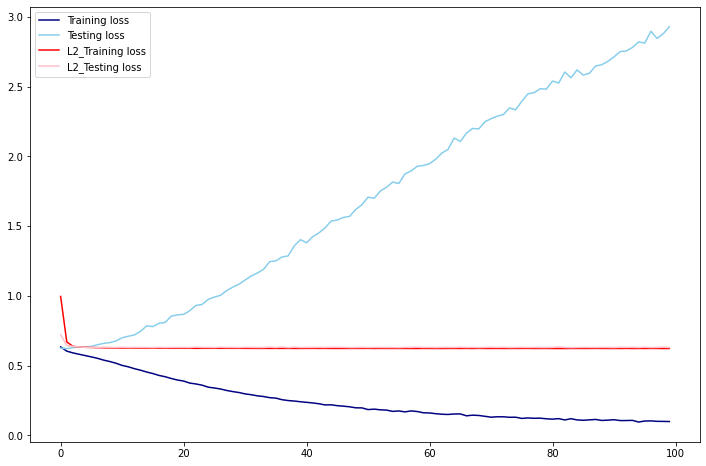

In [128]:
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2_Training loss', color='red')
plt.plot(test_loss_l2, label='L2_Testing loss', color='pink')
plt.legend();

### Visualize the Accuracy

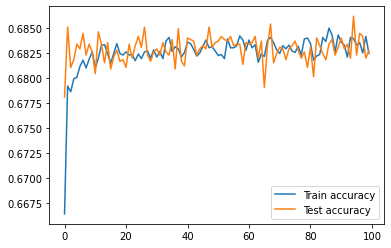

In [133]:
plt.plot(history_l2.history['accuracy'], label='Train accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Test accuracy')
plt.legend();

### Model with Dropout Regularization

In [135]:
model_drop = Sequential()
model_drop.add(Dense(130,
                     input_shape=(131,),
                     activation='relu'))
model_drop.add(Dropout(0.5)) 
model_drop.add(Dense(60,
                     activation='relu'))
model_drop.add(Dropout(0.5)) 
model_drop.add(Dense(1,
                     activation='sigmoid'))

# Compile it
model_drop.compile(loss='bce',
                   optimizer='adam',
                  metrics=['accuracy'])

# Fit it
history_drop = model_drop.fit(X_train_sc, y_train,
                         validation_data=(X_test_sc, y_test),
                         epochs=100,
                         verbose=2)

Epoch 1/100
603/603 - 1s - loss: 0.7012 - accuracy: 0.6024 - val_loss: 0.6316 - val_accuracy: 0.6758
Epoch 2/100
603/603 - 1s - loss: 0.6382 - accuracy: 0.6564 - val_loss: 0.6251 - val_accuracy: 0.6816
Epoch 3/100
603/603 - 1s - loss: 0.6245 - accuracy: 0.6664 - val_loss: 0.6212 - val_accuracy: 0.6808
Epoch 4/100
603/603 - 1s - loss: 0.6218 - accuracy: 0.6719 - val_loss: 0.6143 - val_accuracy: 0.6831
Epoch 5/100
603/603 - 1s - loss: 0.6146 - accuracy: 0.6764 - val_loss: 0.6203 - val_accuracy: 0.6777
Epoch 6/100
603/603 - 1s - loss: 0.6130 - accuracy: 0.6741 - val_loss: 0.6151 - val_accuracy: 0.6811
Epoch 7/100
603/603 - 1s - loss: 0.6091 - accuracy: 0.6806 - val_loss: 0.6129 - val_accuracy: 0.6788
Epoch 8/100
603/603 - 1s - loss: 0.6080 - accuracy: 0.6784 - val_loss: 0.6128 - val_accuracy: 0.6803
Epoch 9/100
603/603 - 1s - loss: 0.6073 - accuracy: 0.6781 - val_loss: 0.6147 - val_accuracy: 0.6788
Epoch 10/100
603/603 - 1s - loss: 0.6036 - accuracy: 0.6793 - val_loss: 0.6115 - val_accura

Epoch 82/100
603/603 - 1s - loss: 0.5488 - accuracy: 0.7069 - val_loss: 0.6252 - val_accuracy: 0.6704
Epoch 83/100
603/603 - 1s - loss: 0.5487 - accuracy: 0.7082 - val_loss: 0.6298 - val_accuracy: 0.6644
Epoch 84/100
603/603 - 1s - loss: 0.5505 - accuracy: 0.7085 - val_loss: 0.6270 - val_accuracy: 0.6654
Epoch 85/100
603/603 - 1s - loss: 0.5504 - accuracy: 0.7078 - val_loss: 0.6276 - val_accuracy: 0.6616
Epoch 86/100
603/603 - 1s - loss: 0.5505 - accuracy: 0.7084 - val_loss: 0.6277 - val_accuracy: 0.6644
Epoch 87/100
603/603 - 1s - loss: 0.5476 - accuracy: 0.7093 - val_loss: 0.6327 - val_accuracy: 0.6669
Epoch 88/100
603/603 - 1s - loss: 0.5455 - accuracy: 0.7097 - val_loss: 0.6299 - val_accuracy: 0.6657
Epoch 89/100
603/603 - 1s - loss: 0.5471 - accuracy: 0.7062 - val_loss: 0.6290 - val_accuracy: 0.6632
Epoch 90/100
603/603 - 1s - loss: 0.5440 - accuracy: 0.7103 - val_loss: 0.6315 - val_accuracy: 0.6640
Epoch 91/100
603/603 - 1s - loss: 0.5492 - accuracy: 0.7088 - val_loss: 0.6342 - v

### Visualize the Loss Compared to the First Model

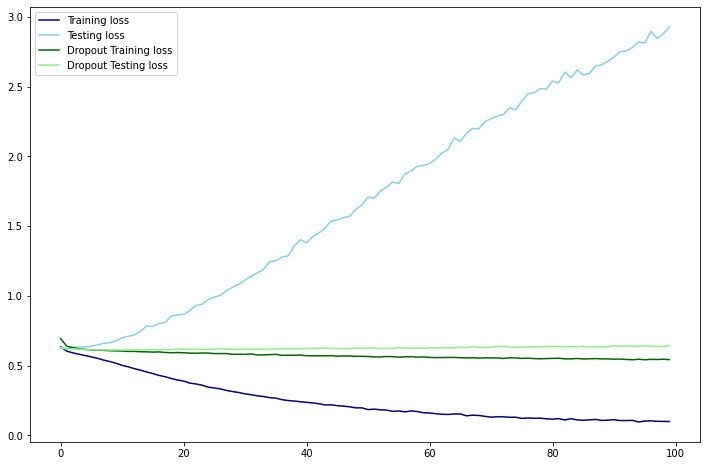

In [131]:
train_loss_dropout = history_drop.history['loss']
test_loss_dropout = history_drop.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_dropout, label='Dropout Training loss', color='darkgreen')
plt.plot(test_loss_dropout, label='Dropout Testing loss', color='lightgreen')
plt.legend();

### Visualize the Accuracy

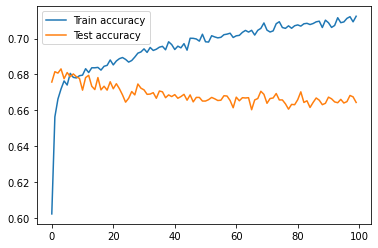

In [136]:
plt.plot(history_drop.history['accuracy'], label='Train accuracy')
plt.plot(history_drop.history['val_accuracy'], label='Test accuracy')
plt.legend();

### Confusion Matrix Using Model with L2 Regularization

In [141]:
preds = model_l2.predict_classes(X_test_sc)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [144]:
metrics.confusion_matrix(y_test, preds)

array([[3121,  476],
       [1562, 1266]])

In [145]:
# Specificity
tn / (tn + fp)

0.8676675006950236

In [146]:
# Sensitivity
tp / (tp + fn)

0.4476661951909477

### Model with L2 Predictions on the 5000 shots

In [172]:
X_TEST = kobe_shots_test.drop(columns=['combined_shot_type', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup','shots_made_flag_preds_knn','shots_made_flag_preds', 'shots_made_flag_preds_l2'])
X_TEST_sc = ss.transform(X_TEST)
kobe_shots_test['shots_made_flag_preds_l2'] = model_l2.predict_classes(X_TEST_sc)

<ipython-input-172-8ab9c06d74d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_shots_test['shots_made_flag_preds_l2'] = model_l2.predict_classes(X_TEST_sc)


In [173]:
nn_l2_predictions = pd.DataFrame({'shot_id': kobe_shots_test['shot_id'],
                           'shot_made_flag': kobe_shots_test['shots_made_flag_preds_l2']})

In [174]:
nn_l2_predictions

,shot_id,shot_made_flag
0,1,0
7,8,0
16,17,1
19,20,1
32,33,0
...,...,...
30668,30669,0
30680,30681,0
30682,30683,1
30686,30687,1
